### Chapter 5 - Data Discretization

#### 5.2. Equal Width Discretization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

diamond_data = sns.load_dataset('diamonds')

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


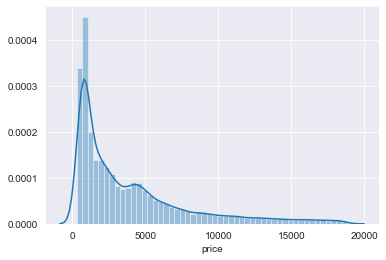

In [3]:
sns.distplot(diamond_data['price'])

In [5]:
price_range = diamond_data['price'].max() - diamond_data['price'].min()
print(price_range )

18497


In [6]:
price_range  / 10

1849.7

In [7]:

lower_interval = int(np.floor( diamond_data['price'].min()))
upper_interval = int(np.ceil( diamond_data['price'].max()))


interval_length = int(np.round(price_range / 10))

print(lower_interval)
print(upper_interval)
print(interval_length)

326
18823
1850


In [8]:
total_bins = [i for i in range(lower_interval, upper_interval+interval_length, interval_length)]
print(total_bins)

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]


In [9]:
bin_labels = ['Bin_no_' + str(i) for i in range(1, len(total_bins))]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [10]:

diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=total_bins, labels=bin_labels,  include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


Text(0, 0.5, 'Number of observations per bin')

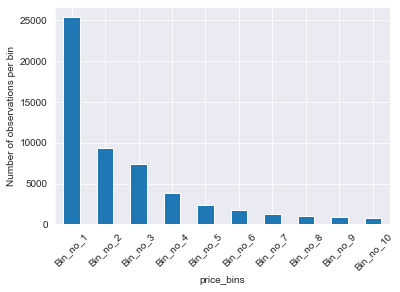

In [11]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)


#### 5.3. Equal Frequency Discretization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

diamond_data = sns.load_dataset('diamonds')

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
discretised_price, bins = pd.qcut(diamond_data['price'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

pd.concat([discretised_price, diamond_data['price']], axis=1).head(10)

,price,price
0,"(325.999, 646.0]",326
1,"(325.999, 646.0]",326
2,"(325.999, 646.0]",327
3,"(325.999, 646.0]",334
4,"(325.999, 646.0]",335
5,"(325.999, 646.0]",336
6,"(325.999, 646.0]",336
7,"(325.999, 646.0]",337
8,"(325.999, 646.0]",337
9,"(325.999, 646.0]",338


In [37]:
print(bins)
print(type(bins))

[  326.    646.    837.   1087.   1698.   2401.   3465.   4662.   6301.2
  9821.  18823. ]
<class 'numpy.ndarray'>


In [19]:
discretised_price.value_counts()

(325.999, 646.0]     5411
(1698.0, 2401.0]     5405
(837.0, 1087.0]      5396
(6301.2, 9821.0]     5395
(3465.0, 4662.0]     5394
(9821.0, 18823.0]    5393
(4662.0, 6301.2]     5389
(1087.0, 1698.0]     5388
(646.0, 837.0]       5385
(2401.0, 3465.0]     5384
Name: price, dtype: int64

In [20]:
bin_labels  = ['Bin_no_' +str(i) for i in range(1,11)]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [21]:

diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=bins, labels=bin_labels,  include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


Text(0, 0.5, 'Number of observations per bin')

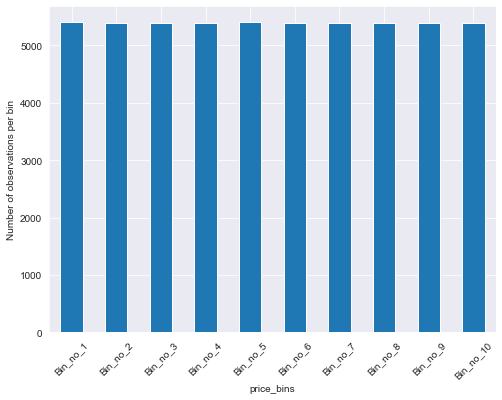

In [22]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)

#### 5.4. K-Means Discretization

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

diamond_data = sns.load_dataset('diamonds')

diamond_data.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [30]:
discretization = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

discretization.fit(diamond_data[['price']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [42]:
intervals = discretization.bin_edges_.tolist()
print(intervals)

[array([  326.        ,  1417.67543928,  2627.50524806,  3950.3762392 ,
        5441.70606939,  7160.05893161,  9140.61465361, 11308.37609661,
       13634.55462656, 16130.22549621, 18823.        ])]


In [43]:
intervals = [  326.        ,  1417.67543928,  2627.50524806,  3950.3762392 ,
        5441.70606939,  7160.05893161,  9140.61465361, 11308.37609661,
       13634.55462656, 16130.22549621, 18823.        ]

In [32]:
bin_labels  = ['Bin_no_' +str(i) for i in range(1,11)]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [44]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=intervals, labels=bin_labels,  include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


Text(0, 0.5, 'Number of observations per bin')

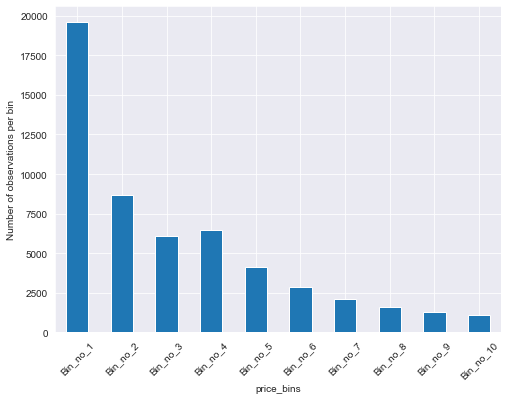

In [45]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)

#### 5.4. Decision Tree Discretization

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier

sns.set_style("darkgrid")

diamond_data = sns.load_dataset('diamonds')

diamond_data.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [51]:
tree_model = DecisionTreeClassifier(max_depth=3)

tree_model.fit(diamond_data['price'].to_frame(), diamond_data['cut'])

diamond_data['price_tree']= tree_model.predict_proba(diamond_data['price'].to_frame())[:,1]

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_tree
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.127435
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.127435
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.127435
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.127435
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.127435


In [52]:

diamond_data['price_tree'].unique()

array([0.12743549, 0.10543414, 0.0964318 , 0.11666667, 0.15124195,
       0.08576481, 0.05252665, 0.08874839])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

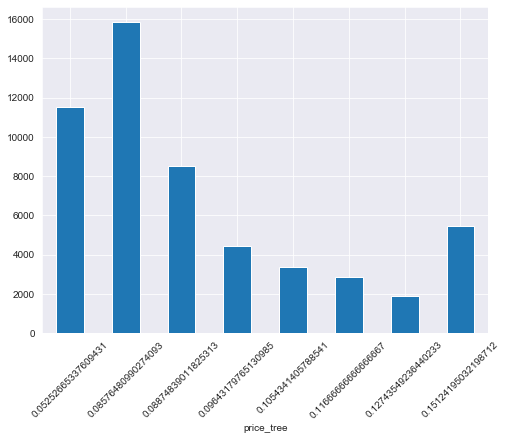

In [67]:

diamond_data.groupby(['price_tree'])['price'].count().plot.bar()
plt.xticks(rotation=45)

#### 5.5. Custom Discretization

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier

sns.set_style("darkgrid")

tips_data = sns.load_dataset('tips')

tips_data.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
tips_data['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [57]:

buckets = [0, 3, 7, 10]


labels = ['0-3', '3-7', '7-10']


tips_data['tip_bins'] = pd.cut(tips_data['tip'], bins=buckets, labels=labels, include_lowest=True)

tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_bins
0,16.99,1.01,Female,No,Sun,Dinner,2,0-3
1,10.34,1.66,Male,No,Sun,Dinner,3,0-3
2,21.01,3.50,Male,No,Sun,Dinner,3,3-7
3,23.68,3.31,Male,No,Sun,Dinner,2,3-7
4,24.59,3.61,Female,No,Sun,Dinner,4,3-7


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

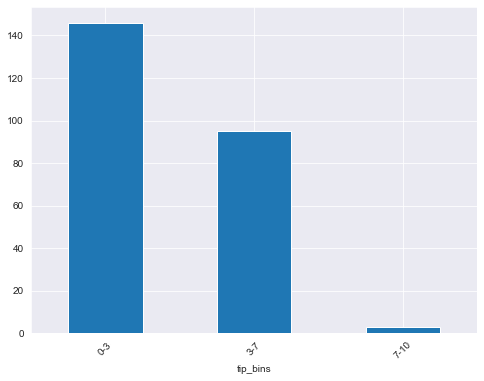

In [58]:
tips_data.groupby('tip_bins')['tip'].count().plot.bar()
plt.xticks(rotation=45)

### Exercise 5.1

#### Question 1

Which of the following discretization scheme is supervised?

A. K Means Discretization \
B. Decision Tree Discretization  \
C. Equal Width Discretization \
D. Equal Frequency Discreatization

Answer: B

#### Question 2

Which of the following discretization scheme generate bins of equal sizes?

A. K Means Discretization \
B. Decision Tree Discretization  \
C. Equal Frequency Discreatization \
D. None of the Above

Answer: D

#### Question 3

Which of the following discretization scheme generate bins containing equal number of samples ?

A. K Means Discretization \
B. Decision Tree Discretization  \
C. Equal Frequency Discreatization \
D. Equal Width Distribution

Answer: C

### Exercise 5.2

Create 5 bins for the `total_bill` column of the tips dataset using equal frequency discretization. Plot a bar plot displaying the frequence of bills per category.

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

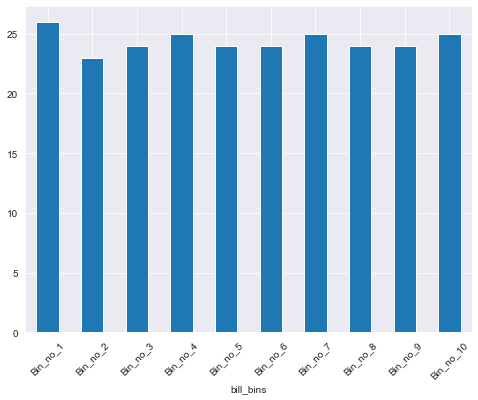

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier

sns.set_style("darkgrid")

tips_data = sns.load_dataset('tips')

tips_data.head()


discretised_bill, bins = pd.qcut(tips_data['total_bill'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

pd.concat([discretised_bill, tips_data['total_bill']], axis=1).head(10)

bin_labels  = ['Bin_no_' +str(i) for i in range(1,11)]
print(bin_labels)

tips_data['bill_bins'] = pd.cut(x=tips_data['total_bill'], bins=bins, labels=bin_labels,  include_lowest=True)
tips_data.head(10)

tips_data.groupby('bill_bins')['total_bill'].count().plot.bar()
plt.xticks(rotation=45)